In [1]:
import pandas as pd

In [3]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')
data_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [4]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [5]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [6]:
feat_info('mort_acc')

Number of mortgage accounts.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [8]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

<AxesSubplot:xlabel='loan_status', ylabel='count'>

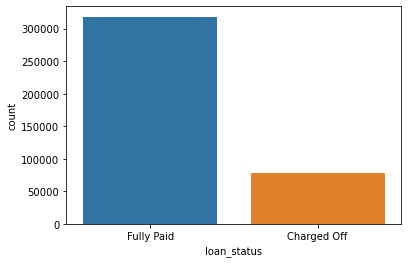

In [12]:
sns.countplot(x='loan_status',data=df)

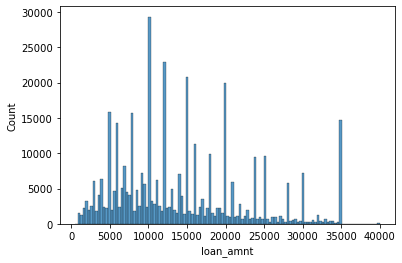

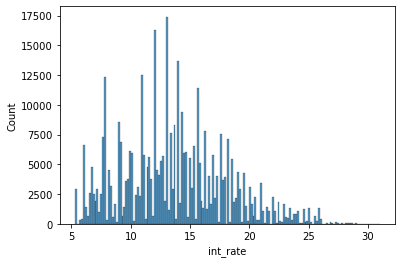

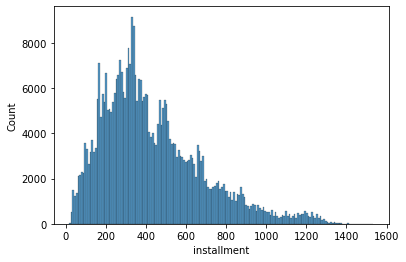

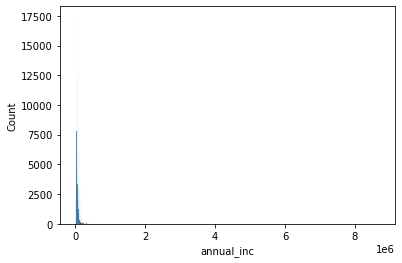

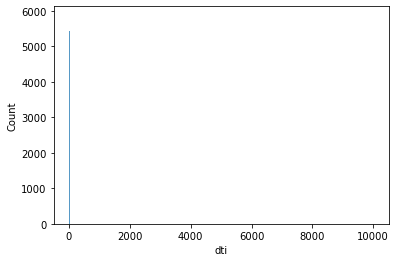

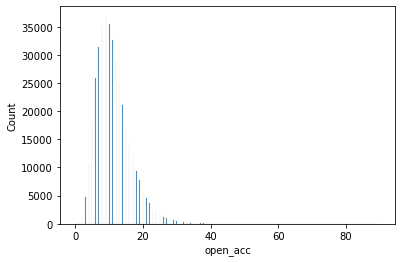

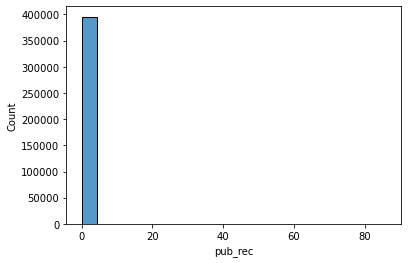

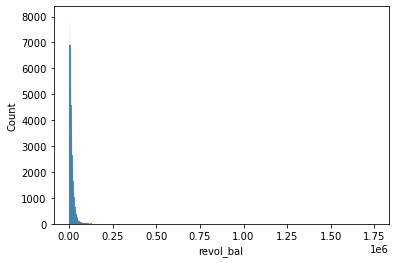

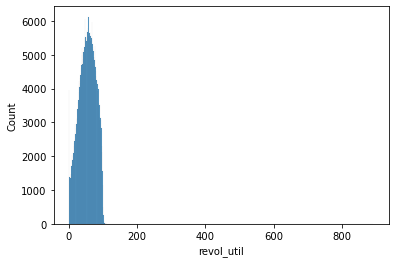

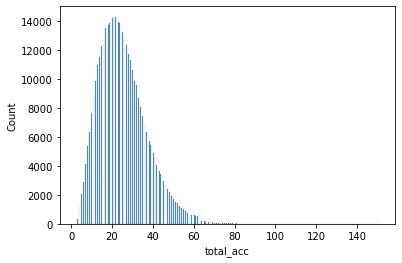

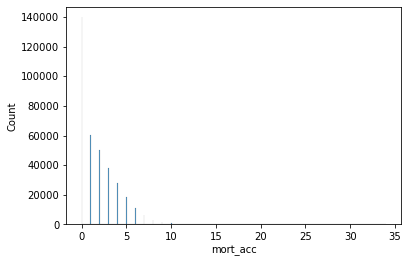

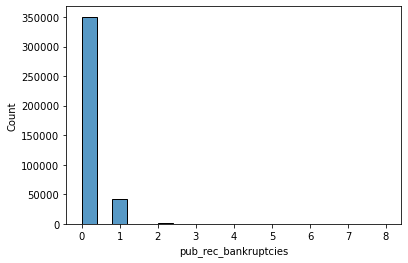

In [32]:
num_var = [feature for feature in df.columns if len(df[feature])>25 and df[feature].dtype!='O']

for feature in num_var:
    
    sns.histplot(x=df[feature])
    plt.show()

In [22]:
df[num_var].head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0


In [33]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

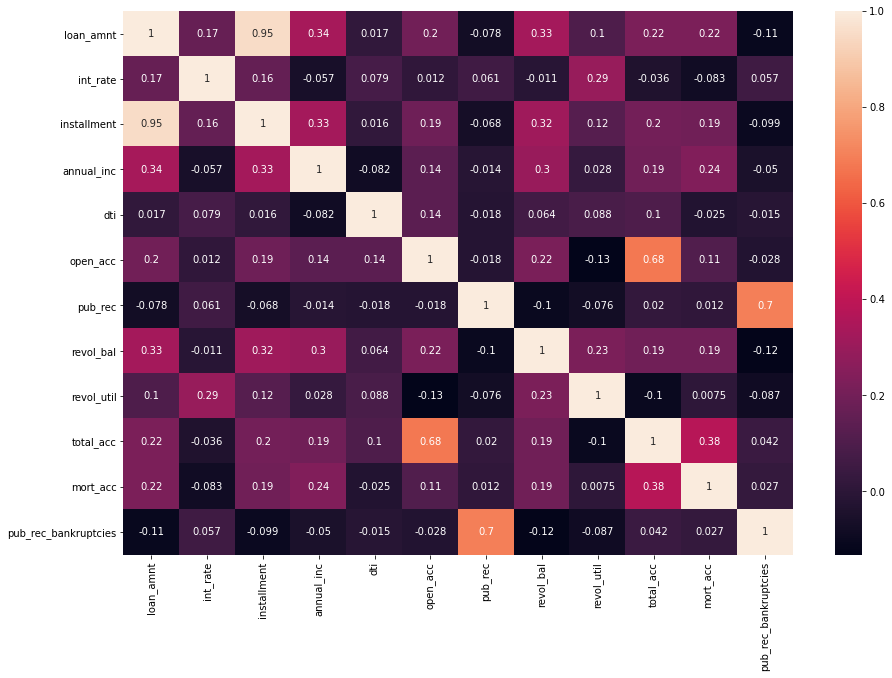

In [36]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [44]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

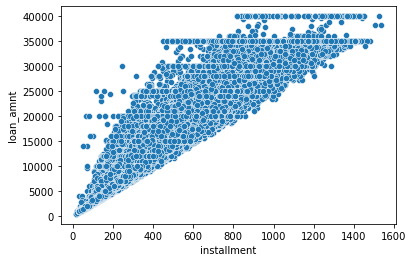

In [47]:
sns.scatterplot(x='installment',y='loan_amnt', data=df)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

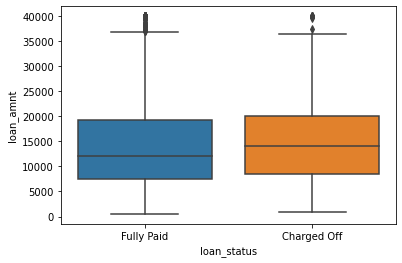

In [48]:
dis_var=[feature for feature in df.columns if len(df[feature].unique())<25]
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [51]:
df.groupby('loan_status').describe()['loan_amnt']

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [61]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<AxesSubplot:xlabel='grade', ylabel='count'>

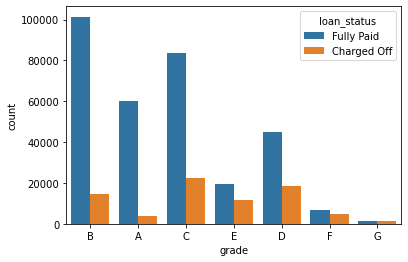

In [65]:
sns.countplot(x='grade',data=df,hue='loan_status')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

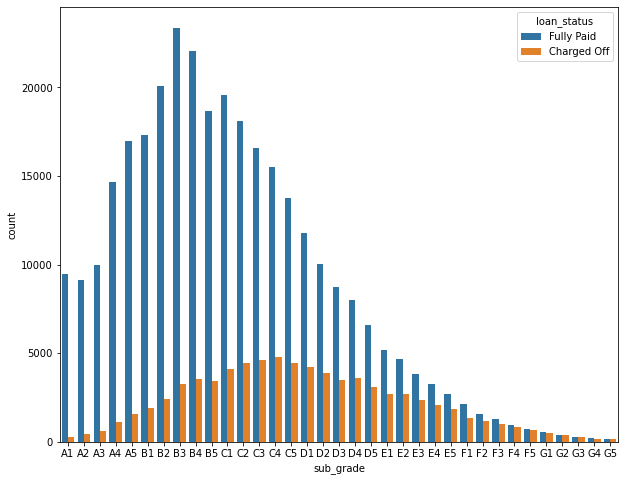

In [71]:
plt.figure(figsize=(10,8))
order_sub=sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',order=order_sub,data=df,hue='loan_status')

In [72]:
sub_fg=[x for x in df['sub_grade'].unique() if 'F' in x or 'G' in x]

In [74]:
sub_fg=sorted(sub_fg)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

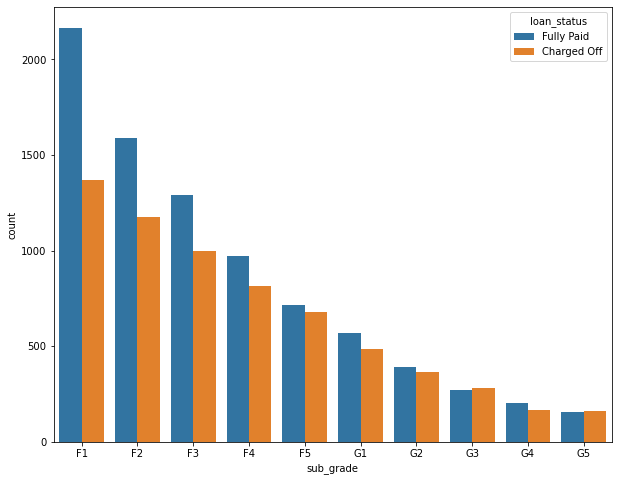

In [75]:
plt.figure(figsize=(10,8))

sns.countplot(x='sub_grade',order=sub_fg,data=df,hue='loan_status')

In [77]:
data =df.copy()
data['loan_repaid']=np.where(df['loan_status']=="Fully Paid",1,0)

In [78]:
data['loan_repaid']

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_repaid, Length: 396030, dtype: int32

In [82]:
data[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


<AxesSubplot:>

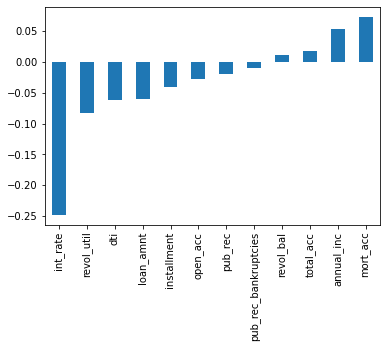

In [84]:
data.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot.bar()

In [88]:
pd.isnull(df).sum().sort_values(ascending=False)

mort_acc                37795
emp_title               22927
emp_length              18301
title                    1755
pub_rec_bankruptcies      535
revol_util                276
address                     0
verification_status         0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
purpose                     0
issue_d                     0
loan_status                 0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
total_acc                   0
initial_list_status         0
application_type            0
loan_amnt                   0
dtype: int64

In [89]:
len(df)

396030

In [93]:
pd.isnull(df).sum().sort_values(ascending=False)/len(df)

mort_acc                0.095435
emp_title               0.057892
emp_length              0.046211
title                   0.004431
pub_rec_bankruptcies    0.001351
revol_util              0.000697
address                 0.000000
verification_status     0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
purpose                 0.000000
issue_d                 0.000000
loan_status             0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
loan_amnt               0.000000
dtype: float64

In [99]:
len(df['emp_title'].unique())

173106

In [100]:
data.drop('emp_title',axis=1,inplace=True)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

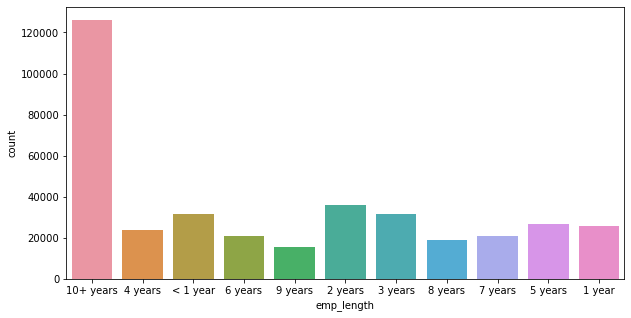

In [106]:
plt.figure(figsize=(10,5))
sns.countplot(x='emp_length',data=data)
lis=[1,2,3,4,5,6,7,8,9,10]
def year(val):
    i=0
     for x in val:
            i=i+1
            if i>1:
                return int(x)
            else:
                return 10
            if int(x)==False:
                break
    
              
              

In [112]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

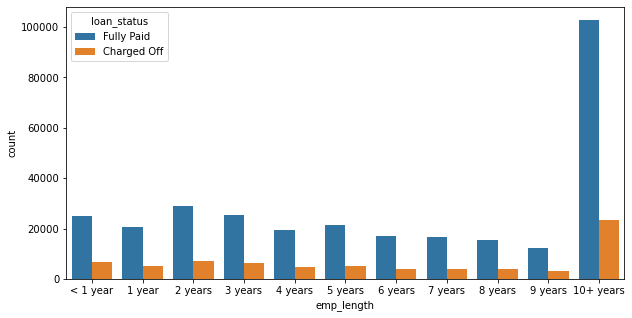

In [114]:
plt.figure(figsize=(10,5))
sns.countplot(x='emp_length',data=data,order=emp_length_order,hue='loan_status')

<AxesSubplot:xlabel='emp_length'>

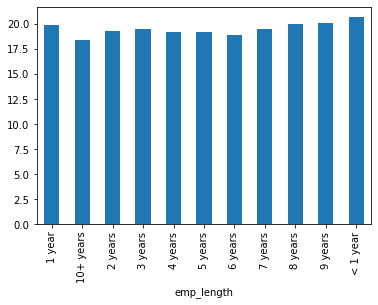

In [130]:
co=df[df['loan_status']=="Charged Off"].groupby('emp_length').count()['loan_status']
fp=df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']
per=(co/(co+fp))*100
per.plot.bar()

In [131]:
data['emp_length'].fillna(method='pad',inplace=True)

In [132]:
pd.isnull(data['emp_length']).sum()

0

In [134]:
pd.isnull(df).sum().sort_values(ascending=False)

mort_acc                37795
emp_title               22927
emp_length              18301
title                    1755
pub_rec_bankruptcies      535
revol_util                276
address                     0
verification_status         0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
purpose                     0
issue_d                     0
loan_status                 0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
total_acc                   0
initial_list_status         0
application_type            0
loan_amnt                   0
dtype: int64

In [138]:
list(df['purpose'].unique())

['vacation',
 'debt_consolidation',
 'credit_card',
 'home_improvement',
 'small_business',
 'major_purchase',
 'other',
 'medical',
 'wedding',
 'car',
 'moving',
 'house',
 'educational',
 'renewable_energy']

In [72]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [139]:
data.drop('title',axis=1,inplace=True)

In [143]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [146]:
df.corr()['mort_acc'].sort_values(ascending=False)

mort_acc                1.000000
total_acc               0.381072
annual_inc              0.236320
loan_amnt               0.222315
revol_bal               0.194925
installment             0.193694
open_acc                0.109205
pub_rec_bankruptcies    0.027239
pub_rec                 0.011552
revol_util              0.007514
dti                    -0.025439
int_rate               -0.082583
Name: mort_acc, dtype: float64

In [157]:
df2=df.groupby('total_acc').mean()['mort_acc']

In [158]:
df2=pd.DataFrame(df2)

In [187]:
def mort_pre(val_t,val_m):
    if np.isnan(val_m):
        return df2.loc[val_t,'mort_acc']
    else:
        return val_m
        


In [193]:
data['mort_acc']=data.apply(lambda x:mort_pre(x['total_acc'],x['mort_acc']),axis=1)

In [194]:
df2

,mort_acc
total_acc,
2.0,0.000000
3.0,0.052023
4.0,0.066743
5.0,0.103289
6.0,0.151293
...,...
124.0,1.000000
129.0,1.000000
135.0,3.000000


In [196]:
pd.isnull(data).sum().sort_values(ascending=False)

pub_rec_bankruptcies    535
revol_util              276
loan_repaid               0
loan_status               0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
purpose                   0
address                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
loan_amnt                 0
dtype: int64

In [200]:
data=data.dropna()

396030

In [201]:
pd.isnull(data).sum().sort_values(ascending=False)

loan_repaid             0
address                 0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
loan_amnt               0
dtype: int64

In [283]:

df_cat=[feature for feature in data.columns if data[feature].dtype=='O'] 

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [215]:
data['term']=data['term'].apply(lambda x:int(x[0:3]))

In [216]:
data.drop('grade',axis=1,inplace=True)

In [220]:
df_dis=[feature for feature in data.columns if len(data[feature].unique())<25] 

In [232]:
df_sg=pd.get_dummies(data['sub_grade'],drop_first=True)
data3=pd.concat([data.drop('sub_grade',axis=1),df_sg],axis=1)
data3

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,2 years,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
396026,21000.0,36,12.29,700.42,5 years,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,10+ years,RENT,56500.0,Verified,Oct-2013,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
396028,21000.0,60,15.31,503.02,10+ years,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,...,0,0,0,0,0,0,0,0,0,0


In [227]:
df_dis

['term',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'pub_rec',
 'initial_list_status',
 'application_type',
 'pub_rec_bankruptcies',
 'loan_repaid']

In [239]:
data.drop('sub_grade',axis=1,inplace=True)

In [236]:
data.drop('emp_length',axis=1,inplace=True)

In [243]:
df_cat=[feature for feature in data.columns if data[feature].dtype=='O'] 
data[df_cat].head()

,home_ownership,issue_d,loan_status,earliest_cr_line,address
0,RENT,Jan-2015,Fully Paid,Jun-1990,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,MORTGAGE,Jan-2015,Fully Paid,Jul-2004,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,RENT,Jan-2015,Fully Paid,Aug-2007,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,RENT,Nov-2014,Fully Paid,Sep-2006,"823 Reid Ford\nDelacruzside, MA 00813"
4,MORTGAGE,Apr-2013,Charged Off,Mar-1999,"679 Luna Roads\nGreggshire, VA 11650"


In [241]:
for feature in ['verification_status', 'application_type','initial_list_status','purpose']:
    df_dum=pd.get_dummies(data[feature],drop_first=True)
    data.drop(feature,axis=1,inplace=True)
    data=pd.concat([data,df_dum],axis=1)


In [244]:
data[df_cat]

,home_ownership,issue_d,loan_status,earliest_cr_line,address
0,RENT,Jan-2015,Fully Paid,Jun-1990,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,MORTGAGE,Jan-2015,Fully Paid,Jul-2004,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,RENT,Jan-2015,Fully Paid,Aug-2007,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,RENT,Nov-2014,Fully Paid,Sep-2006,"823 Reid Ford\nDelacruzside, MA 00813"
4,MORTGAGE,Apr-2013,Charged Off,Mar-1999,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...
396025,RENT,Oct-2015,Fully Paid,Nov-2004,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,MORTGAGE,Feb-2015,Fully Paid,Feb-2006,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,RENT,Oct-2013,Fully Paid,Mar-1997,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,MORTGAGE,Aug-2012,Fully Paid,Nov-1990,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."


In [247]:
for feature in df_cat:
    print(data[feature].value_counts())

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64
Oct-2014    14838
Jul-2014    12597
Jan-2015    11701
Dec-2013    10609
Nov-2013    10492
            ...  
Jan-2008        3
Dec-2007        2
Nov-2007        1
Oct-2007        1
Aug-2007        1
Name: issue_d, Length: 112, dtype: int64
Fully Paid     317696
Charged Off     77523
Name: loan_status, dtype: int64
Oct-2000    3013
Aug-2000    2930
Oct-2001    2890
Aug-2001    2879
Nov-2000    2729
            ... 
Dec-1951       1
Jul-1961       1
Jan-1948       1
Sep-1961       1
Feb-1962       1
Name: earliest_cr_line, Length: 684, dtype: int64
USNS Johnson\nFPO AE 05113                                 8
USS Smith\nFPO AP 70466                                    8
USS Johnson\nFPO AE 48052                                  8
USCGC Smith\nFPO AE 70466                                  8
USNS Johnson\nFPO AP 48052                             

In [249]:
data['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [253]:
data['home_ownership'].replace(to_replace=['NONE','ANY'],value=['OTHER','OTHER'],inplace=True)

In [276]:
def zip_ext(val):
    for i,x in enumerate(val):
        if x==',':
            a=i
            return(val[-5:])

In [277]:
data['zip']=data['address'].apply(zip_ext)

In [279]:
df_dum=pd.get_dummies(data['zip'])
data=pd.concat([data,df_dum],axis=1)

In [281]:
data.drop(['address','zip'],axis=1,inplace=True)

In [288]:

df_cat=[feature for feature in data.columns if data[feature].dtype=='O'] 
data[df_cat]


,loan_status,earliest_cr_line
0,Fully Paid,Jun-1990
1,Fully Paid,Jul-2004
2,Fully Paid,Aug-2007
3,Fully Paid,Sep-2006
4,Charged Off,Mar-1999
...,...,...
396025,Fully Paid,Nov-2004
396026,Fully Paid,Feb-2006
396027,Fully Paid,Mar-1997
396028,Fully Paid,Nov-1990


In [287]:
data.drop('issue_d',axis=1,inplace=True)

In [290]:
data['earliest_cr_line']=pd.to_datetime(df['earliest_cr_line'])

In [319]:
data['earliest_cr_year']=data['earliest_cr_line'].apply(lambda x:int(x.year))
data['earliest_cr_month']=data['earliest_cr_line'].apply(lambda x:int(x.month))


In [302]:
data['loan_repaid']

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_repaid, Length: 395219, dtype: int32

In [300]:
from sklearn.model_selection import train_test_split

In [303]:
data.drop('loan_status',axis=1,inplace=True)

In [320]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 49 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             395219 non-null  float64       
 1   term                  395219 non-null  int64         
 2   int_rate              395219 non-null  float64       
 3   installment           395219 non-null  float64       
 4   annual_inc            395219 non-null  float64       
 5   dti                   395219 non-null  float64       
 6   earliest_cr_line      395219 non-null  datetime64[ns]
 7   open_acc              395219 non-null  float64       
 8   pub_rec               395219 non-null  float64       
 9   revol_bal             395219 non-null  float64       
 10  revol_util            395219 non-null  float64       
 11  total_acc             395219 non-null  float64       
 12  mort_acc              395219 non-null  float64       
 13 

In [324]:
X=data.drop('loan_repaid',axis=1).values
y=data['loan_repaid'].values

In [321]:
data.drop('earliest_cr_line',axis=1,inplace=True)


In [344]:
data.drop('earliest_cr_month',axis=1,inplace=True)

In [310]:
data.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,...,48052,70466,86630,93700,MORTGAGE,OTHER,OWN,RENT,earliest_cr_year,earliest_cr_month
0,10000.0,36,11.44,329.48,117000.0,26.24,1990-06-01,16.0,0.0,36369.0,...,0,0,0,0,0,0,0,1,1990,6
1,8000.0,36,11.99,265.68,65000.0,22.05,2004-07-01,17.0,0.0,20131.0,...,0,0,0,0,1,0,0,0,2004,7
2,15600.0,36,10.49,506.97,43057.0,12.79,2007-08-01,13.0,0.0,11987.0,...,0,0,0,0,0,0,0,1,2007,8
3,7200.0,36,6.49,220.65,54000.0,2.60,2006-09-01,6.0,0.0,5472.0,...,0,0,0,0,0,0,0,1,2006,9
4,24375.0,60,17.27,609.33,55000.0,33.95,1999-03-01,13.0,0.0,24584.0,...,0,0,0,0,1,0,0,0,1999,3


In [345]:
from sklearn.preprocessing import MinMaxScaler

In [346]:
scaler=MinMaxScaler()

In [347]:
X=scaler.fit_transform(X)

In [348]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [349]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [350]:
model = Sequential()
model.add(Dense(96,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(48,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(24,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
es=EarlyStopping(monitor='val_loss', patience=5,
    verbose=1)

In [351]:
model.compile( optimizer='rmsprop',loss='binary_crossentropy')

In [352]:
model.fit(x=X_train,y=y_train,epochs=100,
    verbose=1,
    callbacks=es, batch_size=256,validation_data=(X_test,y_test))

Epoch 1/100
1035/1035 [==============================] - 3s 2ms/step - loss: 0.3434 - val_loss: 0.2758
Epoch 2/100
1035/1035 [==============================] - 2s 2ms/step - loss: 0.2795 - val_loss: 0.2747
Epoch 3/100
1035/1035 [==============================] - 2s 2ms/step - loss: 0.2758 - val_loss: 0.2746
Epoch 4/100
1035/1035 [==============================] - 2s 2ms/step - loss: 0.2769 - val_loss: 0.2744
Epoch 5/100
1035/1035 [==============================] - 2s 2ms/step - loss: 0.2776 - val_loss: 0.2761
Epoch 6/100
1035/1035 [==============================] - 2s 2ms/step - loss: 0.2779 - val_loss: 0.2745
Epoch 7/100
1035/1035 [==============================] - 2s 2ms/step - loss: 0.2752 - val_loss: 0.2751
Epoch 8/100
1035/1035 [==============================] - 2s 2ms/step - loss: 0.2769 - val_loss: 0.2751
Epoch 9/100
1035/1035 [==============================] - 2s 2ms/step - loss: 0.2766 - val_loss: 0.2749
Epoch 00009: early stopping


<AxesSubplot:>

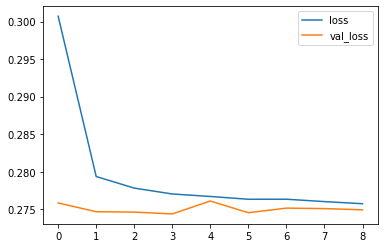

In [353]:
pd.DataFrame(model.history.history).plot()

**TASK: OPTIONAL: Save your model.**

In [354]:
model.save('model1')

INFO:tensorflow:Assets written to: model1\assets


In [359]:
pre

array([[0.7394153 ],
       [0.55747056],
       [0.61081463],
       ...,
       [1.        ],
       [1.        ],
       [0.85948086]], dtype=float32)

In [365]:
pre=(model.predict(X_test) > 0.5).astype("int32")

In [361]:
from sklearn.metrics import classification_report

In [368]:
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

           0       0.97      0.41      0.58     25480
           1       0.87      1.00      0.93    104943

    accuracy                           0.88    130423
   macro avg       0.92      0.70      0.75    130423
weighted avg       0.89      0.88      0.86    130423

